<a href="https://colab.research.google.com/github/colaprograms/2019-hackathon-ocr-wymbah/blob/master/notebooks/beamtst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook gives you some examples of how to use the model, like:

* testing its accuracy on the holdout set.
* running the model on an image file.

In [37]:
import torch, os
import numpy as np
from importlib import reload

USERNAME = "colaprograms"
REPOSITORY = "torch-template"

if os.path.exists("/content"):
    print("We're on Google Colab!")
    os.chdir("/content")
    #if not os.path.exists("/content/AI4Good---Meza-OCR-Challenge"):
    #  !git clone https://github.com/Charitable-Analytics-International/AI4Good---Meza-OCR-Challenge
    if not os.path.exists(f"/content/{REPOSITORY}"):
      !git clone https://github.com/{USERNAME}/{REPOSITORY}
    os.chdir(f"/content/{REPOSITORY}")
    !git pull
else:
    print("We're on Jupyter!")
    if os.path.exists("../notebooks"):
        os.chdir("..")

modules_to_reload = [
    "util.file",
    "util.chars",
    "nets.ctcnet",
    "util.beam",
    "util.beamtest"
]

from importlib import import_module, reload
for module in modules_to_reload:
    print("Reloading %s" % module)
    reload(import_module(module))

import nets.ctcnet, util.file, util.chars, util.beam, util.beamtest

from nets.ctcnet import *
from util.beam import BeamSearch
from util.file import FileHolder, file_list_to_tensor
from util.chars import chars, nchars, idx

fh = FileHolder()

We're on Jupyter!
Reloading util.file
Using images in ../AI4Good---Meza-OCR-Challenge
Reloading util.chars
Reloading nets.ctcnet
Reloading util.beam
Reloading util.beamtest


We try to decode a few images from the validation set.
*** Using checkpoint 0: checkpoint-0049-0.49-CTCModel
Guess: 95.6
Top 3 guesses:
    95.6 (probability = 0.9799)
    93.6 (probability = 0.0064)
    85.6 (probability = 0.0045)
Image:


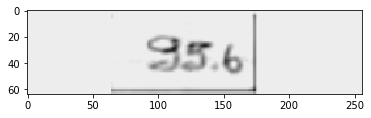

*** Using checkpoint 1: checkpoint-0046-0.43-CTCModel
Guess: 95.6
Top 3 guesses:
    95.6 (probability = 0.9922)
    95,6 (probability = 0.0054)
    956 (probability = 0.0020)
Image:


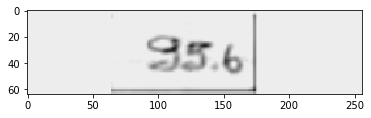

*** Using checkpoint 2: checkpoint-0079-0.42-CTCModel
Guess: 95.6
Top 3 guesses:
    95.6 (probability = 0.9926)
    95,6 (probability = 0.0033)
    85.6 (probability = 0.0028)
Image:


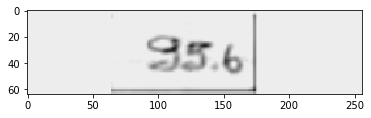

That worked great!


In [43]:
print("We try to decode a few images from the validation set.")

def decode_one_image(test, filename):
    inputs, answer = test.classify_files([filename])
    print("Guess:", answer[0].str())
    print("Top 3 guesses:")
    for z in answer[:3]:
        print("    %s (probability = %.4f)" % (z.str(), np.exp(z.p)))
    print("Image:")
    util.beamtest.show(inputs[0, :, :, :])

from util.beamtest import Test, CHECKPOINTS
print("*** Using checkpoint 0:", CHECKPOINTS[0])
t1 = Test(CHECKPOINTS[0], True)
decode_one_image(t1, "images/cell_images/validation_set/291.jpg")

print("*** Using checkpoint 1:", CHECKPOINTS[1])
t2 = Test(CHECKPOINTS[1], True)
decode_one_image(t2, "images/cell_images/validation_set/291.jpg")

print("*** Using checkpoint 2:", CHECKPOINTS[2])
t3 = Test(CHECKPOINTS[2], True)
decode_one_image(t3, "images/cell_images/validation_set/291.jpg")
print("That worked great!")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Let's try it again!
*** Using checkpoint 0: checkpoint-0049-0.49-CTCModel
Guess: 1.95
Top 3 guesses:
    1.95 (probability = 0.7949)
    11.95 (probability = 0.0988)
    195 (probability = 0.0357)
Image:


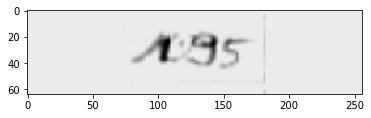

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


*** Using checkpoint 1: checkpoint-0046-0.43-CTCModel
Guess: 195
Top 3 guesses:
    195 (probability = 0.9939)
    19,5 (probability = 0.0010)
    19.5 (probability = 0.0005)
Image:


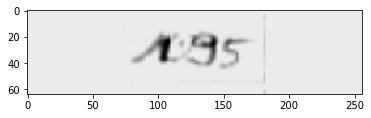

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


*** Using checkpoint 2: checkpoint-0079-0.42-CTCModel
Guess: 195
Top 3 guesses:
    195 (probability = 0.9035)
    1.95 (probability = 0.0873)
    1295 (probability = 0.0062)
Image:


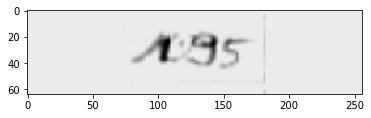

That did not go so well. Oh well, those are the breaks.

This is a hint that we shouldn't take the probabilities too seriously,
since the first model predicted 1.95 with probability 0.79, and
the second one predicted 195 with probability 0.99.


In [31]:
print("Let's try it again!")
print("*** Using checkpoint 0:", CHECKPOINTS[0])
decode_one_image(t1, "images/cell_images/validation_set/296.jpg")
print("*** Using checkpoint 1:", CHECKPOINTS[1])
decode_one_image(t2, "images/cell_images/validation_set/296.jpg")
print("*** Using checkpoint 2:", CHECKPOINTS[2])
decode_one_image(t3, "images/cell_images/validation_set/296.jpg")
print("That did not go so well. Oh well, those are the breaks.")
print()
print("This is a hint that we shouldn't take the probabilities too seriously,")
print("since the first model predicted 1.95 with probability 0.79, and")
print("the second one predicted 195 with probability 0.99.")

In [23]:
print("""Testing the checkpoints on our holdout set.
(This is probably too optimistic since we used the holdout set to choose these checkpoints.)
""")

print("Checkpoint 0:", util.beamtest.CHECKPOINTS[0])
result = util.beamtest.test(util.beamtest.CHECKPOINTS[0], quiet=True)
print(result)
print()
print("Checkpoint 1:", util.beamtest.CHECKPOINTS[1])
result = util.beamtest.test(util.beamtest.CHECKPOINTS[1], quiet=True)
print(result)
print()
print("Checkpoint 2:", util.beamtest.CHECKPOINTS[2])
result = util.beamtest.test(util.beamtest.CHECKPOINTS[2], quiet=True)
print(result)

Testing the checkpoints on our holdout set.
(This is probably too optimistic since we used the holdout set to choose these checkpoints.)

Checkpoint 0: checkpoint-0049-0.49-CTCModel
Testing 750 images


KeyboardInterrupt: 

In [42]:
torch.zeros(1, 2, 2).shape

torch.Size([1, 2, 2])

In [64]:
ensembleoutput = [Test(CHECKPOINTS[j], True).allbeams() for j in range(3)]

Done  64/750.
Done 128/750.
Done 192/750.
Done 256/750.
Done 320/750.
Done 384/750.
Done 448/750.
Done 512/750.
Done 576/750.
Done 640/750.
Done 704/750.
Done 750/750.
Done  64/750.
Done 128/750.
Done 192/750.
Done 256/750.
Done 320/750.
Done 384/750.
Done 448/750.
Done 512/750.
Done 576/750.
Done 640/750.
Done 704/750.
Done 750/750.
Done  64/750.
Done 128/750.
Done 192/750.
Done 256/750.
Done 320/750.
Done 384/750.
Done 448/750.
Done 512/750.
Done 576/750.
Done 640/750.
Done 704/750.
Done 750/750.


In [83]:
print("Try an ensemble prediction.")

#ensemble = [Test(CHECKPOINTS[j], True) for j in range(3)]

def add_beams(probs, beamlist):
    newprobs = {}
    for beam in beamlist:
        prefix = util.beam.prefix_to_string(beam.prefix)
        p = beam.p
        if probs is None:
            newprobs[prefix] = p
        elif prefix in probs:
            newprobs[prefix] = probs[prefix] + p
        else:
            newprobs[prefix] = -999 + p
    return newprobs
        
def decode_one_image_ensemble(ensemble, filename):
    def classify(t, f):
        inputs, answer = t.classify_files([filename])
        return answer
    answers = [classify(t, filename) for t in ensemble]
    probs = None
    for answer in answers:
        probs = add_beams(probs, answer)
    print(probs)

def combine_one_from_answers(z, j):
    probs = None
    for answers in z:
        probs = add_beams(probs, answers[j])
    maxprefix = None
    maxprob = None
    for (prefix, p) in probs.items():
        if maxprob is None or p > maxprob:
            maxprob = p
            maxprefix = prefix
    return maxprefix

def test():
    count = 0
    for ii in range(fh.nvalidation()):
        pr = combine_one_from_answers(ensembleoutput, ii)
        oo = fh.info['validation'][ii][1]
        if pr == oo:
            count += 1
        else:
            print(f"error at {ii}: {pr} != {oo}")
    print(f"{count}/{fh.nvalidation()} successful")
    return count

decode_one_image_ensemble(ensemble, "images/cell_images/validation_set/299.jpg")
test()

Try an ensemble prediction.
{'12.5': -0.48175181686115826, '12,5': -8.938541769981384, '125': -22.211092948913574, '112.5': -1017.443115234375, '112,5': -1009.1694355010986, '1265': -1009.9181890487671, '1235': -1009.9227495193481, '12.56': -1012.3385948572526}
error at 8: 13.6 != 136
error at 41: -21.94 != -7194
error at 60: 21500 != 21,500
error at 94: 250 != 230
error at 95: 81,800 != 8,800
error at 148: 25 != 2,5
error at 160: 5,600 != 5600
error at 161: 226 != 22,6
error at 165: 8900 != 89
error at 170: 3500 != 3,500
error at 173: 7,700 != 7,100
error at 179: 19.5 != 195
error at 190: 34 != 134
error at 191: 78 != 79
error at 203: 15 != 1.5
error at 268: 1,500 != 6,500
error at 284: 6 != 67
error at 295: 18.5 != 18.3
error at 298: 61 != 67
error at 343: 9.7 != 9,7
error at 375: 81 != 21
error at 386: 120 != 130
error at 403: 10 != 70
error at 417: 117 != 11.7
error at 422: 98 != 9,8
error at 431: 13.6 != 136
error at 446: 8,4 != 8.4
error at 462: 68 != -68
error at 468: 150 != 15


704

In [86]:
709 / 750

0.9453333333333334

In [69]:
fh.nvalidation()

750

In [73]:
fh.info['validation'][299]

('4419.jpg', '10,4')